In [55]:
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt
import urllib.request, json
import os
import numpy as np
import tensorflow as tf # This code has been tested with TensorFlow 1.6
import sklearn.preprocessing as skl
import numpy as np

In [56]:
import os
os.getcwd()

'C:\\Users\\Carlos\\Desktop\\Data Science\\00 -TFM\\9- Parsing & Modelling'

In [57]:
datosMatchPrices10=pd.read_csv("dataMatchPrices10.csv")
datosMatchPrices10.head()


,time,maker_side,size,price_mean,num_orders,price_max,price_min
0,2018-06-25 18:31:46,sell,0.001850,6278.750,1,6278.75,6278.75
1,2018-06-25 18:31:34,sell,0.180300,6274.350,1,6274.35,6274.35
2,2018-06-25 18:30:31,sell,0.520844,6274.350,4,6274.35,6274.35
3,2018-06-25 18:29:18,buy,0.631500,6276.065,2,6277.12,6275.01
4,2018-06-25 18:28:46,sell,0.025100,6277.290,1,6277.29,6277.29


In [58]:
datosMatchPrices10 = datosMatchPrices10.sort_values('time',ascending=True)
datosMatchPrices10.head()

,time,maker_side,size,price_mean,num_orders,price_max,price_min
2482,2018-06-25 10:45:04,buy,0.001080,6194.110,1,6194.11,6194.11
2481,2018-06-25 10:45:28,sell,0.051218,6194.190,2,6194.24,6194.14
2480,2018-06-25 10:47:27,sell,0.239400,6193.620,1,6193.62,6193.62
2479,2018-06-25 10:47:44,buy,0.000005,6193.110,1,6193.11,6193.11
2478,2018-06-25 10:48:00,buy,0.102480,6185.505,2,6187.50,6183.51


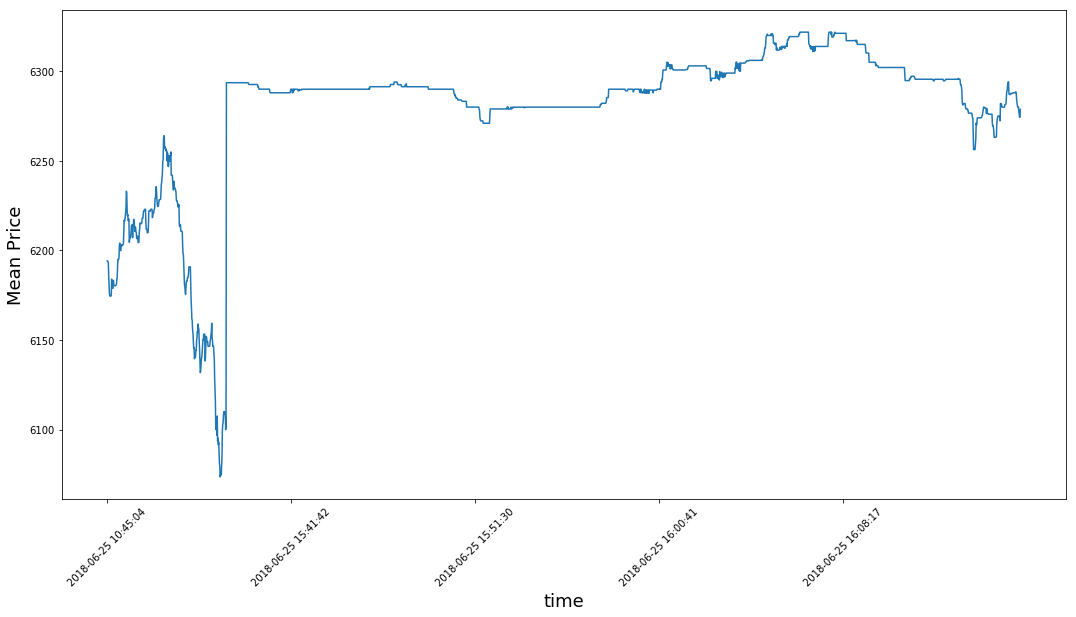

In [59]:
plt.figure(figsize = (18,9))
plt.plot(range(datosMatchPrices10.shape[0]),(datosMatchPrices10['price_mean']))
plt.xticks(range(0,datosMatchPrices10.shape[0],500),datosMatchPrices10['time'].loc[::500],rotation=45)
plt.xlabel('time',fontsize=18)
plt.ylabel('Mean Price',fontsize=18)
plt.show()

In [60]:
# Dividimos en Train y Test
round(len(datosMatchPrices10)/2)
#matrixDatosMatchPrices10=datosMatchPrices10.as_matrix()

1242

In [61]:
train_data = datosMatchPrices10[:1242]
test_data = datosMatchPrices10[1242:]
train_data.head()

,time,maker_side,size,price_mean,num_orders,price_max,price_min
2482,2018-06-25 10:45:04,buy,0.001080,6194.110,1,6194.11,6194.11
2481,2018-06-25 10:45:28,sell,0.051218,6194.190,2,6194.24,6194.14
2480,2018-06-25 10:47:27,sell,0.239400,6193.620,1,6193.62,6193.62
2479,2018-06-25 10:47:44,buy,0.000005,6193.110,1,6193.11,6193.11
2478,2018-06-25 10:48:00,buy,0.102480,6185.505,2,6187.50,6183.51


In [62]:
# num_cols = train_data.columns[train_data.dtypes.apply(lambda c: np.issubdtype(c, np.number))]
# scaler = skl.StandardScaler()

# scaler.fit(train_data[num_cols])
# train_data[num_cols]=scaler.transform(train_data[num_cols])
# test_data[num_cols]=scaler.transform(test_data[num_cols])
# test_data

In [63]:
train_data=train_data.as_matrix()
test_data=test_data.as_matrix()
train_data

array([['2018-06-25 10:45:04', 'buy', 0.00108, ..., 1, 6194.11, 6194.11],
       ['2018-06-25 10:45:28', 'sell', 0.05121794, ..., 2, 6194.24,
        6194.14],
       ['2018-06-25 10:47:27', 'sell', 0.2394, ..., 1, 6193.62, 6193.62],
       ...,
       ['2018-06-25 15:55:59', 'sell', 0.001, ..., 1, 6280.0, 6280.0],
       ['2018-06-25 15:56:00', 'sell', 0.001, ..., 1, 6280.0, 6280.0],
       ['2018-06-25 15:56:05', 'buy', 0.002, ..., 2, 6279.99, 6279.99]],
      dtype=object)

In [64]:
#MSE
window_size = 100
N = train_data.size
std_avg_predictions = []
std_avg_x = []
mse_errors = []

N

8694

In [65]:
len(train_data)

1242

In [66]:
train_data[:,:]

array([['2018-06-25 10:45:04', 'buy', 0.00108, ..., 1, 6194.11, 6194.11],
       ['2018-06-25 10:45:28', 'sell', 0.05121794, ..., 2, 6194.24,
        6194.14],
       ['2018-06-25 10:47:27', 'sell', 0.2394, ..., 1, 6193.62, 6193.62],
       ...,
       ['2018-06-25 15:55:59', 'sell', 0.001, ..., 1, 6280.0, 6280.0],
       ['2018-06-25 15:56:00', 'sell', 0.001, ..., 1, 6280.0, 6280.0],
       ['2018-06-25 15:56:05', 'buy', 0.002, ..., 2, 6279.99, 6279.99]],
      dtype=object)

In [67]:
def running_mean(x, N):
    cumsum = np.cumsum(np.insert(x, 0, 0)) 
    return np.append([0]*(N-1),(cumsum[N:] - cumsum[:-N]) / float(N))

In [68]:
MA10=running_mean(train_data[:,3],10)

In [69]:
train_data.shape

(1242, 7)

In [70]:
MA10=MA10.reshape(MA10.shape[0],1)
MA10

array([[0],
       [0],
       [0],
       ...,
       [6279.994000000134],
       [6279.994000000134],
       [6279.993000000157]], dtype=object)

In [71]:
# AÑADIMOS LA MA10 al train_data
train_data=np.concatenate((train_data,MA10), axis=1)

In [72]:
train_data[:,7]

array([0, 0, 0, ..., 6279.994000000134, 6279.994000000134,
       6279.993000000157], dtype=object)

In [73]:
#pandas_train_data=pandas_train_data[pandas_train_data.MA10>0]

## Lagging price 

In [74]:
pandas_train_data=pd.DataFrame(train_data, columns=["time", "side_maker", "size", "meanPrice", "nOrders", "maxPrice", "minPrice", "MA10" ])

In [75]:
pandas_train_data= pandas_train_data[["time", "maxPrice", "size", "meanPrice", "minPrice", "MA10", "nOrders", "side_maker"]]

In [76]:
#pandas_train_data.columns = ["time", "maxPrice","maxPriceLagged", "size", "meanPrice", "minPrice", "MA10", "nOrders", "side_maker"]

In [77]:
pandas_train_data.head()

,time,maxPrice,size,meanPrice,minPrice,MA10,nOrders,side_maker
0,2018-06-25 10:45:04,6194.11,0.00108,6194.11,6194.11,0,1,buy
1,2018-06-25 10:45:28,6194.24,0.0512179,6194.19,6194.14,0,2,sell
2,2018-06-25 10:47:27,6193.62,0.2394,6193.62,6193.62,0,1,sell
3,2018-06-25 10:47:44,6193.11,5.09e-06,6193.11,6193.11,0,1,buy
4,2018-06-25 10:48:00,6187.5,0.10248,6185.51,6183.51,0,2,buy


In [78]:
#pandas_train_data.maxPriceLagged=pandas_train_data.maxPriceLagged.shift(-1)
list(range(1,3))

[1, 2]

In [79]:
lags = range(1,3)
pandas_train_data_lagged=pandas_train_data.assign(**{
    "{}_lagg_{}".format(col, -t): pandas_train_data[col].shift(t)
    for t in lags
    for col in pandas_train_data
})

In [80]:
pandas_train_data_lagged.head()

,time,maxPrice,size,meanPrice,minPrice,MA10,nOrders,side_maker,time_lagg_-1,maxPrice_lagg_-1,...,nOrders_lagg_-1,side_maker_lagg_-1,time_lagg_-2,maxPrice_lagg_-2,size_lagg_-2,meanPrice_lagg_-2,minPrice_lagg_-2,MA10_lagg_-2,nOrders_lagg_-2,side_maker_lagg_-2
0,2018-06-25 10:45:04,6194.11,0.00108,6194.11,6194.11,0,1,buy,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-06-25 10:45:28,6194.24,0.0512179,6194.19,6194.14,0,2,sell,2018-06-25 10:45:04,6194.11,...,1,buy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2018-06-25 10:47:27,6193.62,0.2394,6193.62,6193.62,0,1,sell,2018-06-25 10:45:28,6194.24,...,2,sell,2018-06-25 10:45:04,6194.11,0.00108,6194.11,6194.11,0,1,buy
3,2018-06-25 10:47:44,6193.11,5.09e-06,6193.11,6193.11,0,1,buy,2018-06-25 10:47:27,6193.62,...,1,sell,2018-06-25 10:45:28,6194.24,0.0512179,6194.19,6194.14,0,2,sell
4,2018-06-25 10:48:00,6187.5,0.10248,6185.51,6183.51,0,2,buy,2018-06-25 10:47:44,6193.11,...,1,buy,2018-06-25 10:47:27,6193.62,0.2394,6193.62,6193.62,0,1,sell


In [81]:
pandas_train_data_lagged.drop(["time_lagg_-2","time_lagg_-1"], axis=1, inplace=True)

In [82]:
pandas_train_data_lagged.count()

time                  1242
maxPrice              1242
size                  1242
meanPrice             1242
minPrice              1242
MA10                  1242
nOrders               1242
side_maker            1242
maxPrice_lagg_-1      1241
size_lagg_-1          1241
meanPrice_lagg_-1     1241
minPrice_lagg_-1      1241
MA10_lagg_-1          1241
nOrders_lagg_-1       1241
side_maker_lagg_-1    1241
maxPrice_lagg_-2      1240
size_lagg_-2          1240
meanPrice_lagg_-2     1240
minPrice_lagg_-2      1240
MA10_lagg_-2          1240
nOrders_lagg_-2       1240
side_maker_lagg_-2    1240
dtype: int64

In [83]:
pandas_train_data_lagged.side_maker=pandas_train_data_lagged.side_maker.astype("category")
pandas_train_data_lagged.dtypes

time                    object
maxPrice                object
size                    object
meanPrice               object
minPrice                object
MA10                    object
nOrders                 object
side_maker            category
maxPrice_lagg_-1        object
size_lagg_-1            object
meanPrice_lagg_-1       object
minPrice_lagg_-1        object
MA10_lagg_-1            object
nOrders_lagg_-1         object
side_maker_lagg_-1      object
maxPrice_lagg_-2        object
size_lagg_-2            object
meanPrice_lagg_-2       object
minPrice_lagg_-2        object
MA10_lagg_-2            object
nOrders_lagg_-2         object
side_maker_lagg_-2      object
dtype: object

In [84]:
pandas_train_data_lagged=pandas_train_data_lagged[1:]

In [54]:
pandas_train_data_lagged.to_csv("pandas_train_data_lagged.csv", index=False)